# Image classification with CNN cifar10
<img src="cifar10.jpg">

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

## Load data base

In [2]:
# Class names in data base
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Data base
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
# Images normalizer
x_train = x_train / 255.0
x_test = x_test / 255.0 
x_test.shape

(10000, 32, 32, 3)

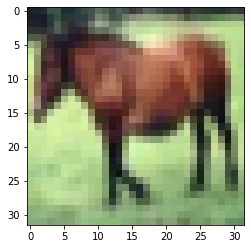

In [4]:
plt.imshow(x_train[7])

## Criate model arquiteture CNN

In [5]:
class Network():
    def __init__(self, input_shape, number_class ):
        self.model = tf.keras.models.Sequential()
        self.input_shape = input_shape
        self.number_class = number_class
    
    def net(self):
        self.model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu', input_shape=(self.input_shape)))
        self.model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu'))
        self.model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2, padding='valid'))
        self.model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding='same', activation = 'relu'))
        self.model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding='same', activation = 'relu'))
        self.model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2, padding='valid'))

        self.model.add(tf.keras.layers.Flatten())
        self.model.add(tf.keras.layers.Dense(units=128, activation='relu'))
        self.model.add(tf.keras.layers.Dropout(0.2))
        self.model.add(tf.keras.layers.Dense(units=128, activation='relu'))
        self.model.add(tf.keras.layers.Dropout(0.2))
        self.model.add(tf.keras.layers.Dense(units=128, activation='relu'))
        self.model.add(tf.keras.layers.Dense(units = self.number_class, activation = 'softmax'))
        self.model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
        return self.model

In [6]:

input_shape = (32, 32, 3)
number_class = 10
obj_net = Network(input_shape, number_class)
network = obj_net.net()
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

## Training the neural Network

In [7]:
network.fit(x_train, y_train, epochs =10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 293us/sample - loss: 1.5531 - sparse_categorical_accuracy: 0.4264
Epoch 2/10
50000/50000 [==============================] - 12s 244us/sample - loss: 1.0924 - sparse_categorical_accuracy: 0.6139
Epoch 3/10
50000/50000 [==============================] - 12s 244us/sample - loss: 0.9154 - sparse_categorical_accuracy: 0.6819
Epoch 4/10
50000/50000 [==============================] - 12s 240us/sample - loss: 0.7947 - sparse_categorical_accuracy: 0.7234
Epoch 5/10
50000/50000 [==============================] - 12s 243us/sample - loss: 0.7036 - sparse_categorical_accuracy: 0.7558
Epoch 6/10
50000/50000 [==============================] - 12s 241us/sample - loss: 0.6345 - sparse_categorical_accuracy: 0.7805
Epoch 7/10
50000/50000 [==============================] - 12s 243us/sample - loss: 0.5789 - sparse_categorical_accuracy: 0.7994
Epoch 8/10
50000/50000 [==============================] - 12s 244us/sample - loss

## Test model data base test

In [8]:
test_loss, test_accuracy = network.evaluate(x_test, y_test)

## Save model

In [9]:
model_json = network.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

## Save weights

In [10]:
network.save_weights("fashion_model.h5")